In [61]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams.update({"font.family": "serif"})
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 14


In [3]:
# Paths
PATH_MLP_LOGIT = (
    "test_results/experiment_results_20240301_1/experiment_results_20240301_1.json"
)
PATH_RFC_MLP = (
    "test_results/experiment_results_20240302_1/experiment_results_20240302_1.json"
)
PATH_RFC_LOGIT = (
    "test_results/experiment_results_20240302_2/experiment_results_20240302_2.json"
)

# Reading files
with open(PATH_MLP_LOGIT, "r") as file:
    mlp_logit_dict = json.load(file);
with open(PATH_RFC_MLP, "r") as file:
    rfc_mlp_dict = json.load(file);
with open(PATH_RFC_LOGIT, "r") as file:
    rfc_logit_dict = json.load(file);

# Into df
mlp_logit = pd.DataFrame(mlp_logit_dict)
rfc_mlp = pd.DataFrame(rfc_mlp_dict)
rfc_logit = pd.DataFrame(rfc_logit_dict)


### Plotting Model to Model

MLP is M1 and Logit is m2

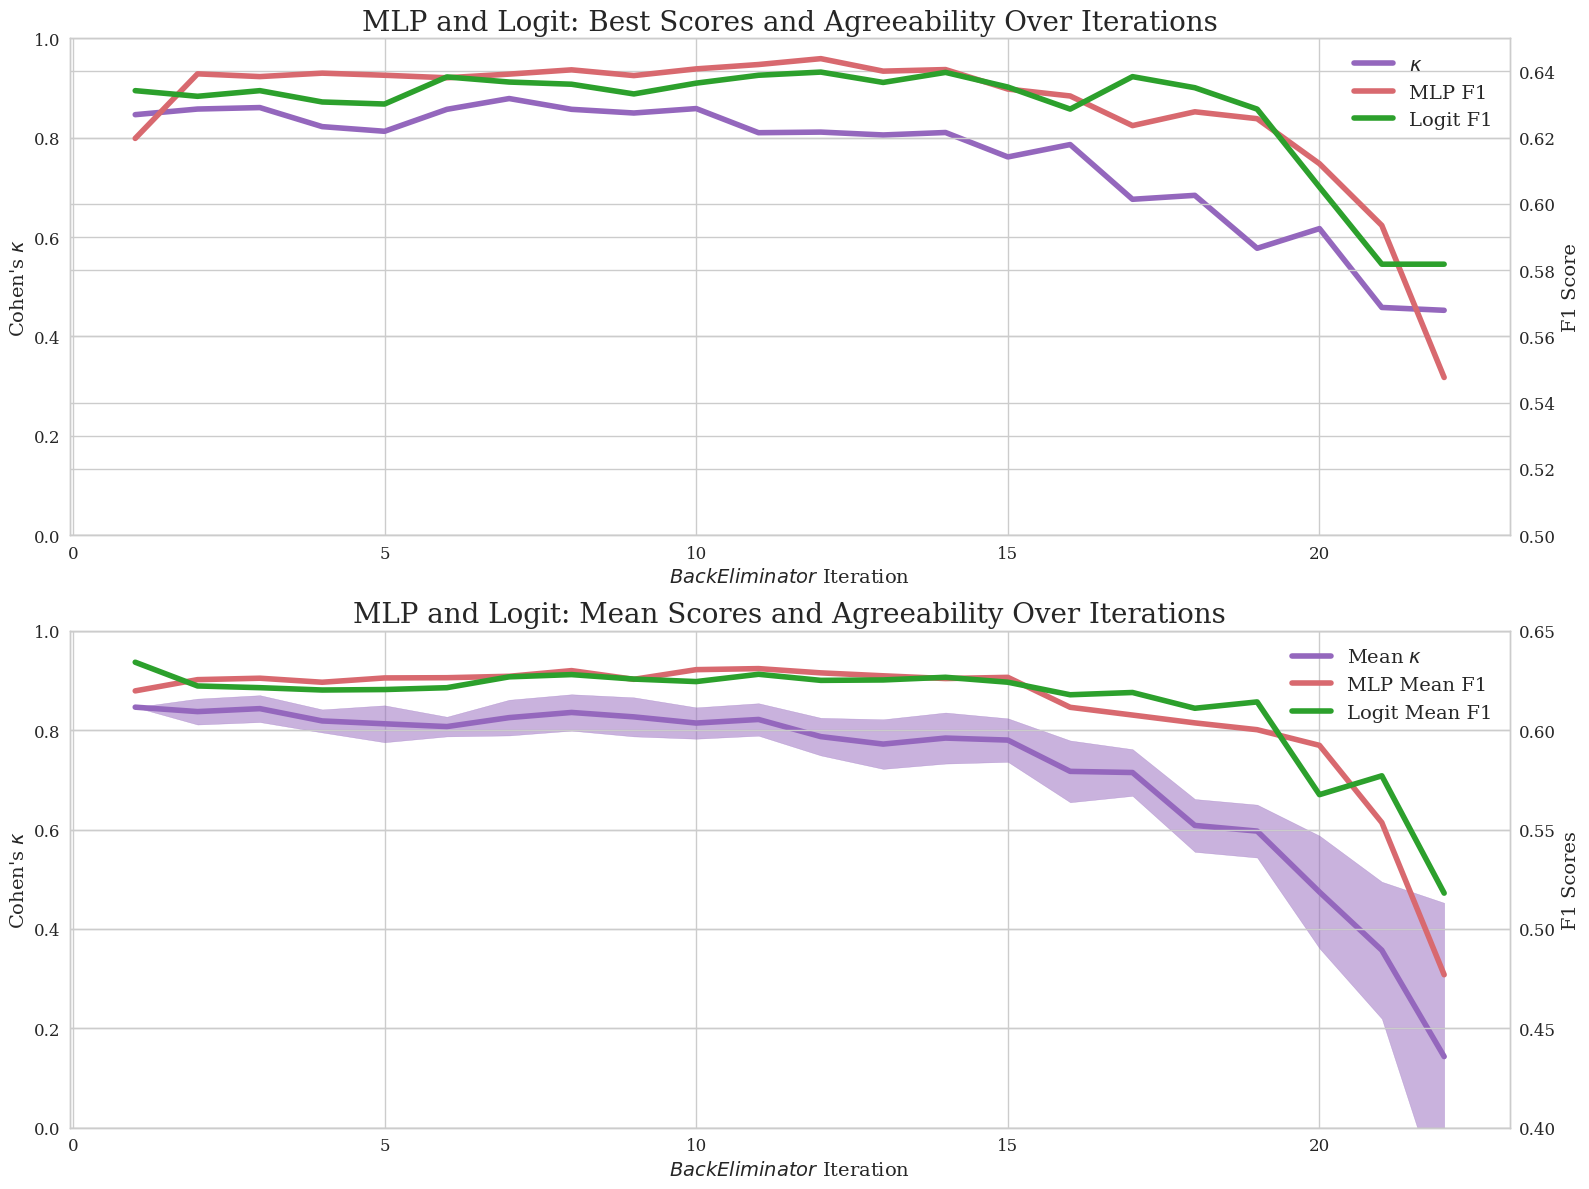

In [69]:
# two y axis
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(16, 12))

# plot agreeability
ax1.set_xlabel("$BackEliminator$ Iteration")
ax1.set_ylabel("Cohen's $\kappa$")
ax1.plot(
    mlp_logit.index + 1,
    mlp_logit.iloc[:, 4],
    label="$\kappa$",
    linewidth=4,
    color="#9467bd",
)
ax1.tick_params(axis="y")
# NOTE
ax1.set_ylim([0, 1])

# plot model scores
ax2 = ax1.twinx()
ax2.set_ylabel("F1 Score")
ax2.plot(
    mlp_logit.index + 1,
    mlp_logit.iloc[:, 1],
    label="MLP F1",
    linewidth=4,
    color="#D8696F",
)
ax2.plot(
    mlp_logit.index + 1,
    mlp_logit.iloc[:, 3],
    label="Logit F1",
    linewidth=4,
    color="#2CA02C",
)
ax2.tick_params(axis="y")
# NOTE
ax2.set_ylim([0.5, 0.65])

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best")

fig.tight_layout()
ax1.set_title(
    "MLP and Logit: Best Scores and Agreeability Over Iterations",
)


# Plot agreeability on lhs axis
ax3.set_xlabel("$BackEliminator$ Iteration")
ax3.set_ylabel("Cohen's $\kappa$")
ax3.plot(
    mlp_logit.index + 1,
    mlp_logit.iloc[:, 9],
    label="Mean $\kappa$",
    linewidth=4,
    color="#9467bd",
)
ax3.fill_between(
    mlp_logit.index + 1,
    mlp_logit.iloc[:, 9] - mlp_logit.iloc[:, 10],
    mlp_logit.iloc[:, 9] + mlp_logit.iloc[:, 10],
    alpha=0.5,
    color="#9467bd",
)
ax3.tick_params(axis="y")
# NOTE can be activated to fix lhs y axis between 0-1
ax3.set_ylim([0, 1])

# Plot model scores on rhs axis
ax4 = ax3.twinx()
ax4.set_ylabel("F1 Scores")
ax4.plot(
    mlp_logit.index + 1,
    mlp_logit.iloc[:, 5],
    label="MLP Mean F1",
    linewidth=4,
    color="#D8696F",
)
#ax2.fill_between(
#    mlp_logit.index + 1,
#    mlp_logit.iloc[:, 5] - mlp_logit.iloc[:, 6],
#    mlp_logit.iloc[:, 5] + mlp_logit.iloc[:, 6],
#    alpha=0.2,
#    color="#D8696F",
#)
ax4.plot(
    mlp_logit.index + 1,
    mlp_logit.iloc[:, 7],
    label="Logit Mean F1",
    linewidth=4,
    color="#2CA02C",
)
# ax2.fill_between(
#    mlp_logit.index + 1,
#    mlp_logit.iloc[:, 7] - mlp_logit.iloc[:, 8],
#    mlp_logit.iloc[:, 7] + mlp_logit.iloc[:, 8],
#    alpha=0.2,
#    color="#2CA02C",
#)
ax4.tick_params(axis="y")
# NOTE can be activated to fix lower bound of rhs y axis at 0
ax4.set_ylim([0.4, 0.65])

# Combined legend
lines, labels = ax3.get_legend_handles_labels()
lines2, labels2 = ax4.get_legend_handles_labels()
ax4.legend(lines + lines2, labels + labels2, loc="best")

# Title, layout, save
ax3.set_title(
    "MLP and Logit: Mean Scores and Agreeability Over Iterations"
)

plt.tight_layout()
plt.savefig("paper_plots/mlp_logit.pdf", format="pdf")
plt.show()

RFC is M1, MLP is M2

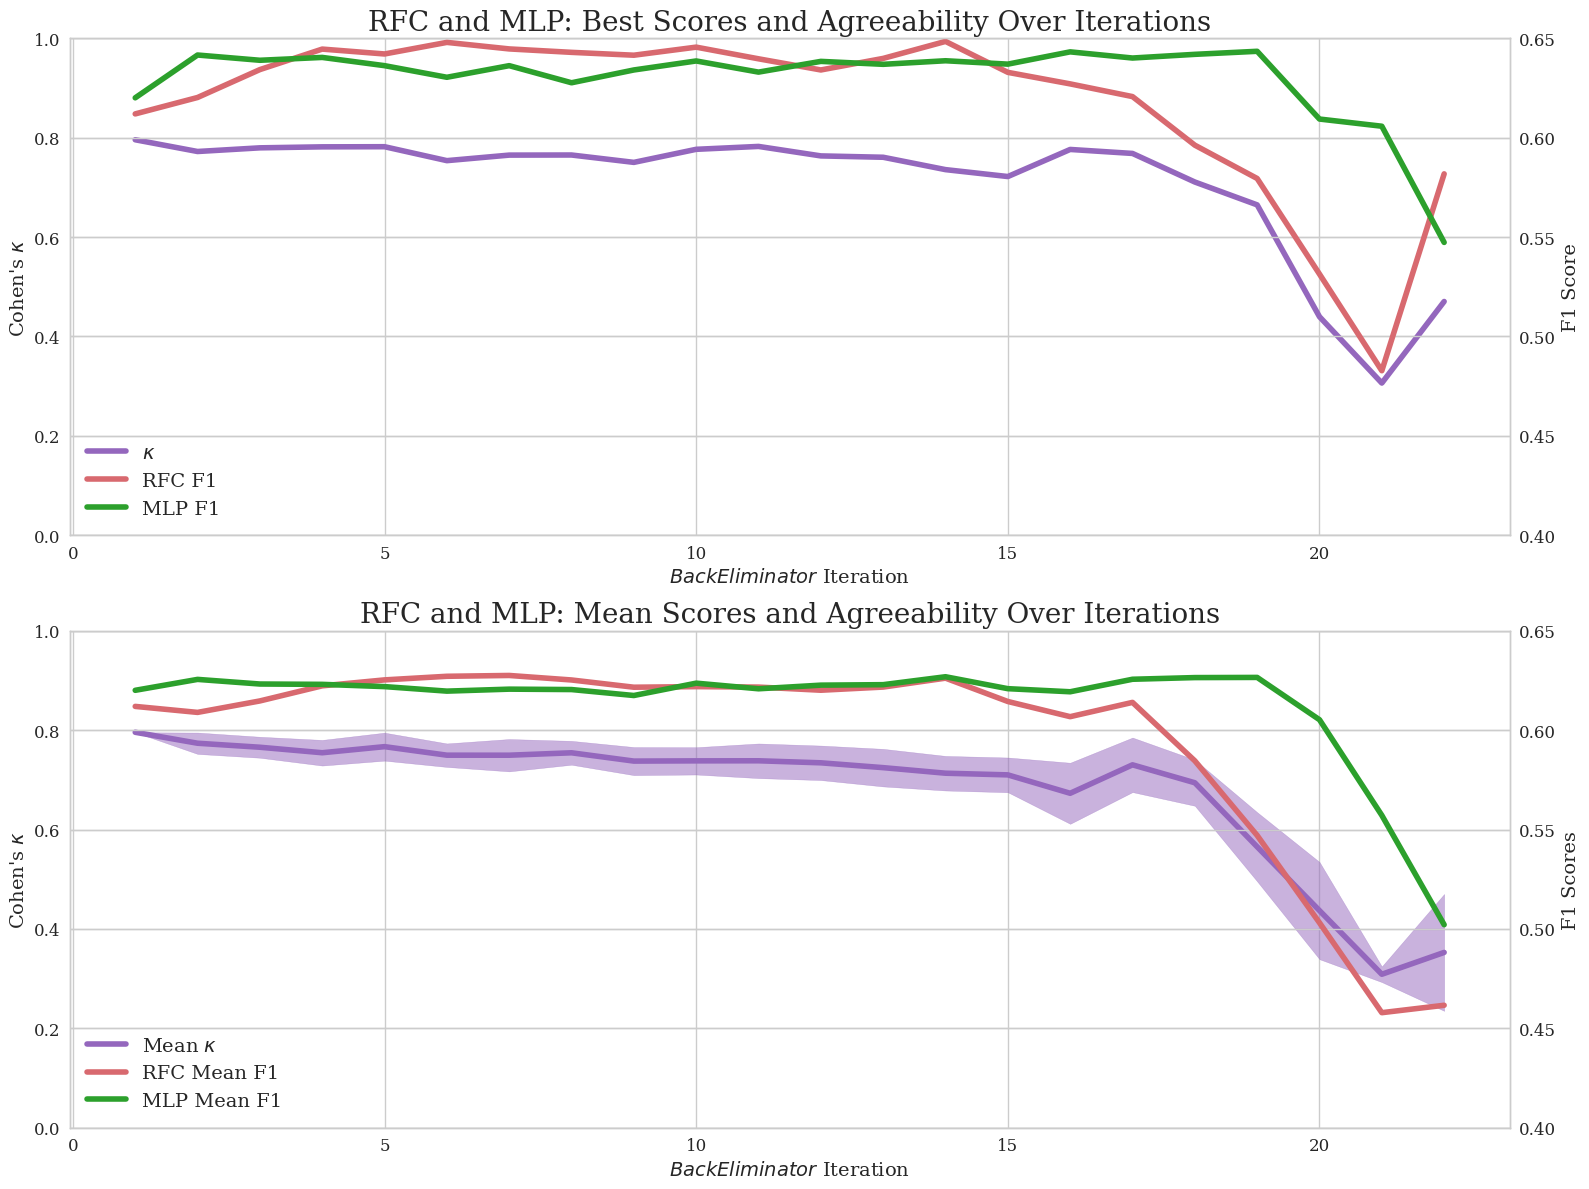

In [72]:
# two y axis
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(16, 12))

# plot agreeability
ax1.set_xlabel("$BackEliminator$ Iteration")
ax1.set_ylabel("Cohen's $\kappa$")
ax1.plot(
    rfc_mlp.index + 1,
    rfc_mlp.iloc[:, 4],
    label="$\kappa$",
    linewidth=4,
    color="#9467bd",
)
ax1.tick_params(axis="y")
# NOTE
ax1.set_ylim([0, 1])

# plot model scores
ax2 = ax1.twinx()
ax2.set_ylabel("F1 Score")
ax2.plot(
    rfc_mlp.index + 1,
    rfc_mlp.iloc[:, 1],
    label="RFC F1",
    linewidth=4,
    color="#D8696F",
)
ax2.plot(
    rfc_mlp.index + 1,
    rfc_mlp.iloc[:, 3],
    label="MLP F1",
    linewidth=4,
    color="#2CA02C",
)
ax2.tick_params(axis="y")
# NOTE
ax2.set_ylim([0.4, 0.65])

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best")

fig.tight_layout()
ax1.set_title(
    "RFC and MLP: Best Scores and Agreeability Over Iterations",
)


# Plot agreeability on lhs axis
ax3.set_xlabel("$BackEliminator$ Iteration")
ax3.set_ylabel("Cohen's $\kappa$")
ax3.plot(
    rfc_mlp.index + 1,
    rfc_mlp.iloc[:, 9],
    label="Mean $\kappa$",
    linewidth=4,
    color="#9467bd",
)
ax3.fill_between(
    rfc_mlp.index + 1,
    rfc_mlp.iloc[:, 9] - rfc_mlp.iloc[:, 10],
    rfc_mlp.iloc[:, 9] + rfc_mlp.iloc[:, 10],
    alpha=0.5,
    color="#9467bd",
)
ax3.tick_params(axis="y")
# NOTE can be activated to fix lhs y axis between 0-1
ax3.set_ylim([0, 1])

# Plot model scores on rhs axis
ax4 = ax3.twinx()
ax4.set_ylabel("F1 Scores")
ax4.plot(
    rfc_mlp.index + 1,
    rfc_mlp.iloc[:, 5],
    label="RFC Mean F1",
    linewidth=4,
    color="#D8696F",
)
#ax2.fill_between(
#    mlp_logit.index + 1,
#    mlp_logit.iloc[:, 5] - mlp_logit.iloc[:, 6],
#    mlp_logit.iloc[:, 5] + mlp_logit.iloc[:, 6],
#    alpha=0.2,
#    color="#D8696F",
#)
ax4.plot(
    rfc_mlp.index + 1,
    rfc_mlp.iloc[:, 7],
    label="MLP Mean F1",
    linewidth=4,
    color="#2CA02C",
)
# ax2.fill_between(
#    mlp_logit.index + 1,
#    mlp_logit.iloc[:, 7] - mlp_logit.iloc[:, 8],
#    mlp_logit.iloc[:, 7] + mlp_logit.iloc[:, 8],
#    alpha=0.2,
#    color="#2CA02C",
#)
ax4.tick_params(axis="y")
# NOTE can be activated to fix lower bound of rhs y axis at 0
ax4.set_ylim([0.4, 0.65])

# Combined legend
lines, labels = ax3.get_legend_handles_labels()
lines2, labels2 = ax4.get_legend_handles_labels()
ax4.legend(lines + lines2, labels + labels2, loc="best")

# Title, layout, save
ax3.set_title(
    "RFC and MLP: Mean Scores and Agreeability Over Iterations"
)

plt.tight_layout()
plt.savefig("paper_plots/rfc_mlp.pdf", format="pdf")
plt.show()

RFC is M1 and Logit is M2

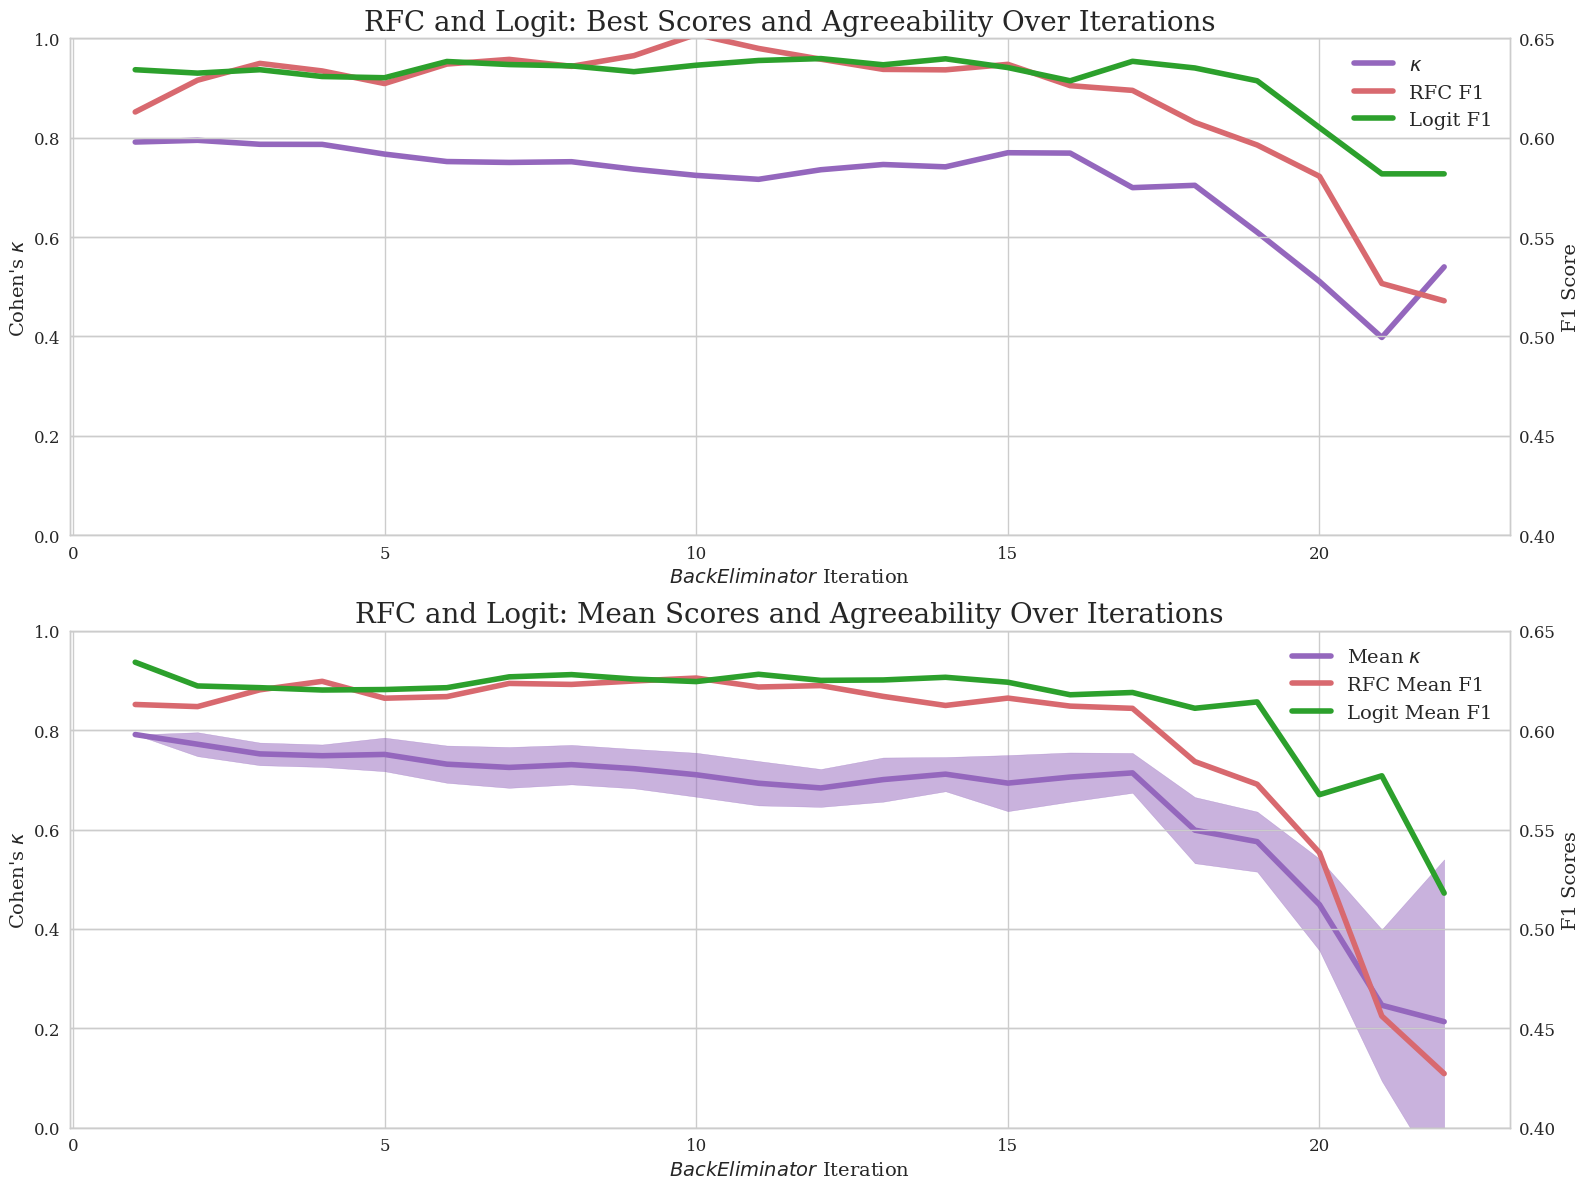

In [73]:
# two y axis
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(16, 12))

# plot agreeability
ax1.set_xlabel("$BackEliminator$ Iteration")
ax1.set_ylabel("Cohen's $\kappa$")
ax1.plot(
    rfc_logit.index + 1,
    rfc_logit.iloc[:, 4],
    label="$\kappa$",
    linewidth=4,
    color="#9467bd",
)
ax1.tick_params(axis="y")
# NOTE
ax1.set_ylim([0, 1])

# plot model scores
ax2 = ax1.twinx()
ax2.set_ylabel("F1 Score")
ax2.plot(
    rfc_logit.index + 1,
    rfc_logit.iloc[:, 1],
    label="RFC F1",
    linewidth=4,
    color="#D8696F",
)
ax2.plot(
    rfc_logit.index + 1,
    rfc_logit.iloc[:, 3],
    label="Logit F1",
    linewidth=4,
    color="#2CA02C",
)
ax2.tick_params(axis="y")
# NOTE
ax2.set_ylim([0.4, 0.65])

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best")

fig.tight_layout()
ax1.set_title(
    "RFC and Logit: Best Scores and Agreeability Over Iterations",
)


# Plot agreeability on lhs axis
ax3.set_xlabel("$BackEliminator$ Iteration")
ax3.set_ylabel("Cohen's $\kappa$")
ax3.plot(
    rfc_logit.index + 1,
    rfc_logit.iloc[:, 9],
    label="Mean $\kappa$",
    linewidth=4,
    color="#9467bd",
)
ax3.fill_between(
    rfc_logit.index + 1,
    rfc_logit.iloc[:, 9] - rfc_logit.iloc[:, 10],
    rfc_logit.iloc[:, 9] + rfc_logit.iloc[:, 10],
    alpha=0.5,
    color="#9467bd",
)
ax3.tick_params(axis="y")
# NOTE can be activated to fix lhs y axis between 0-1
ax3.set_ylim([0, 1])

# Plot model scores on rhs axis
ax4 = ax3.twinx()
ax4.set_ylabel("F1 Scores")
ax4.plot(
    rfc_logit.index + 1,
    rfc_logit.iloc[:, 5],
    label="RFC Mean F1",
    linewidth=4,
    color="#D8696F",
)
#ax2.fill_between(
#    mlp_logit.index + 1,
#    mlp_logit.iloc[:, 5] - mlp_logit.iloc[:, 6],
#    mlp_logit.iloc[:, 5] + mlp_logit.iloc[:, 6],
#    alpha=0.2,
#    color="#D8696F",
#)
ax4.plot(
    rfc_logit.index + 1,
    rfc_logit.iloc[:, 7],
    label="Logit Mean F1",
    linewidth=4,
    color="#2CA02C",
)
# ax2.fill_between(
#    mlp_logit.index + 1,
#    mlp_logit.iloc[:, 7] - mlp_logit.iloc[:, 8],
#    mlp_logit.iloc[:, 7] + mlp_logit.iloc[:, 8],
#    alpha=0.2,
#    color="#2CA02C",
#)
ax4.tick_params(axis="y")
# NOTE can be activated to fix lower bound of rhs y axis at 0
ax4.set_ylim([0.4, 0.65])

# Combined legend
lines, labels = ax3.get_legend_handles_labels()
lines2, labels2 = ax4.get_legend_handles_labels()
ax4.legend(lines + lines2, labels + labels2, loc="best")

# Title, layout, save
ax3.set_title(
    "RFC and Logit: Mean Scores and Agreeability Over Iterations"
)

plt.tight_layout()
plt.savefig("paper_plots/rfc_logit.pdf", format="pdf")
plt.show()

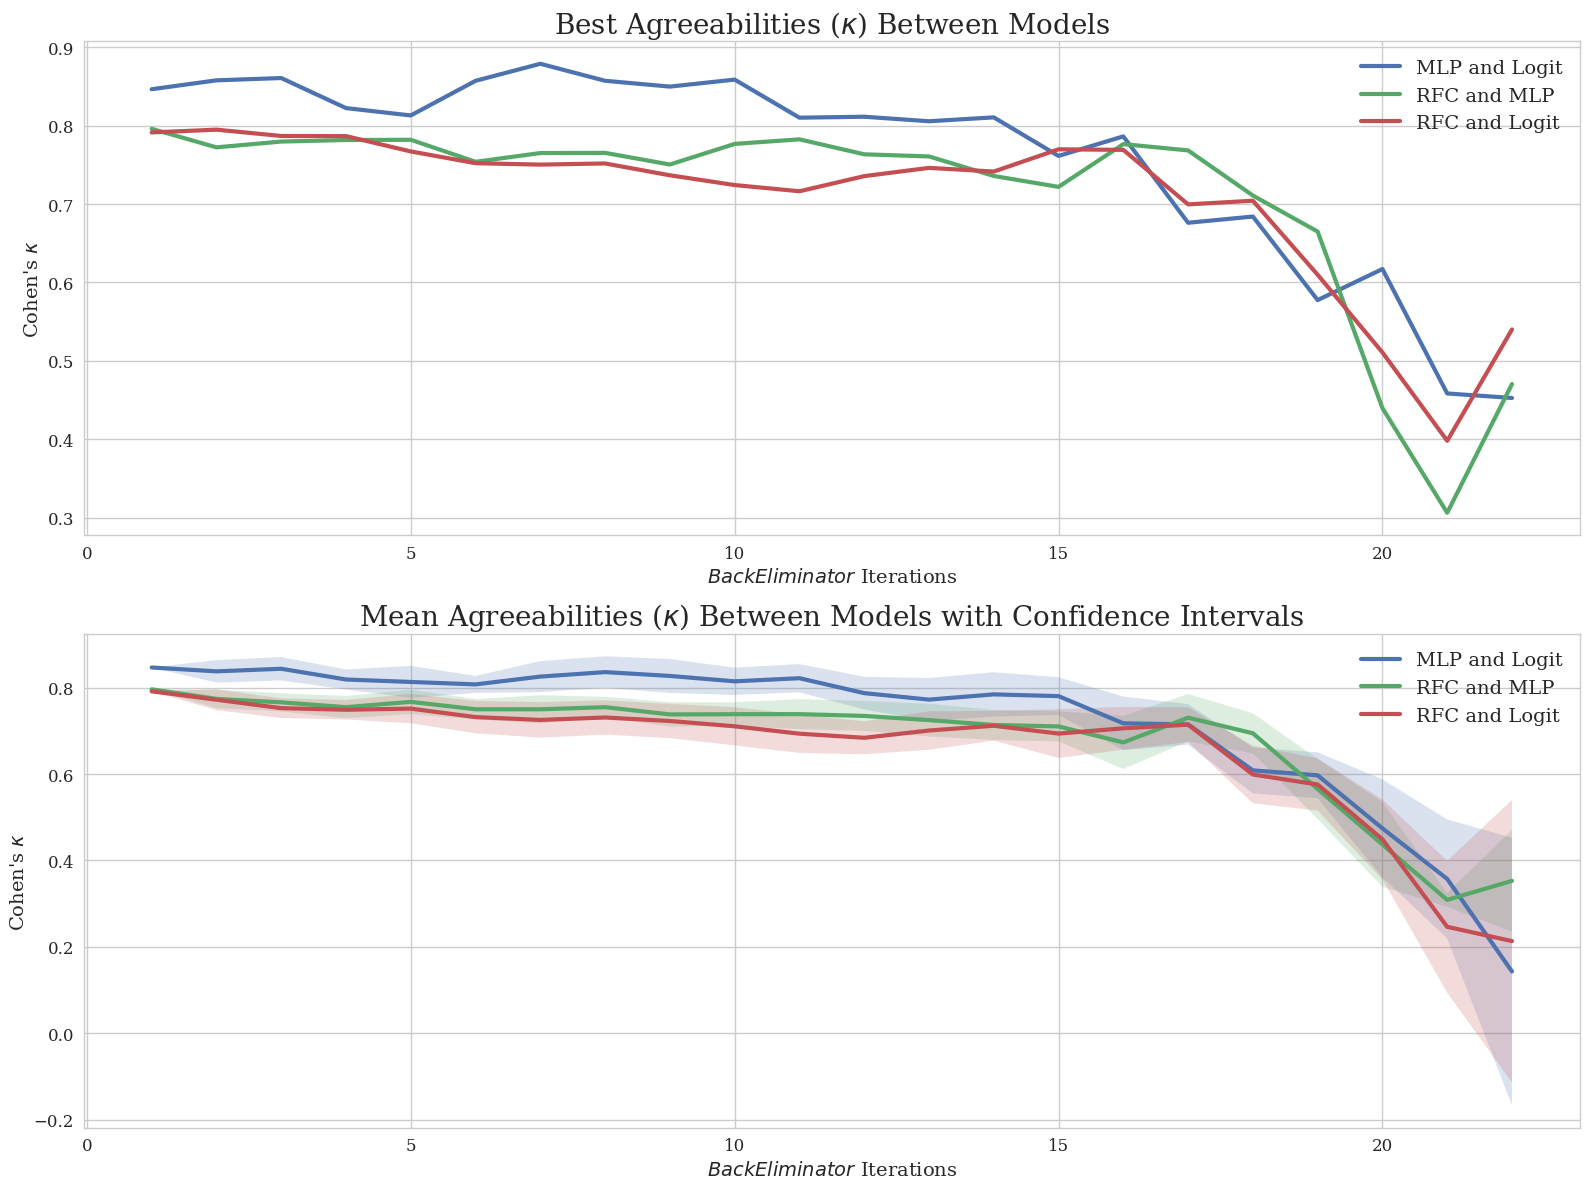

In [77]:


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))


agree_col = "Best: Agreeability (cohen_kappa)"
algorithm_iterations = mlp_logit.index + 1

ax1.plot(
    algorithm_iterations,
    mlp_logit[agree_col],
    label="MLP and Logit",
    linewidth=3,
)
ax1.plot(
    algorithm_iterations,
    rfc_mlp[agree_col],
    label="RFC and MLP",
    linewidth=3,
)
ax1.plot(
    algorithm_iterations,
    rfc_logit[agree_col],
    label="RFC and Logit",
    linewidth=3,
)
ax1.set_title("Best Agreeabilities ($\kappa$) Between Models")
ax1.set_ylabel("Cohen\'s $\kappa$")
ax1.set_xlabel("$BackEliminator$ Iterations")
ax1.legend(loc="best")
# ax1.set_ylim([0, 1])

# Second plot on ax2
mean_agree_col = "All: Mean Agreeability (cohen_kappa)"
std_agree_col = "All: Agreeability St. Dev."

ax2.plot(
    algorithm_iterations,
    mlp_logit[mean_agree_col],
    label="MLP and Logit",
    linewidth=3,
)
ax2.plot(
    algorithm_iterations,
    rfc_mlp[mean_agree_col],
    label="RFC and MLP",
    linewidth=3,
)
ax2.plot(
    algorithm_iterations,
    rfc_logit[mean_agree_col],
    label="RFC and Logit",
    linewidth=3,
)

ax2.fill_between(
    algorithm_iterations,
    mlp_logit[mean_agree_col] - mlp_logit[std_agree_col],
    mlp_logit[mean_agree_col] + mlp_logit[std_agree_col],
    alpha=0.2,
)
ax2.fill_between(
    algorithm_iterations,
    rfc_mlp[mean_agree_col] - rfc_mlp[std_agree_col],
    rfc_mlp[mean_agree_col] + rfc_mlp[std_agree_col],
    alpha=0.2,
)
ax2.fill_between(
    algorithm_iterations,
    rfc_logit[mean_agree_col] - rfc_logit[std_agree_col],
    rfc_logit[mean_agree_col] + rfc_logit[std_agree_col],
    alpha=0.2,
)

ax2.set_title(
    "Mean Agreeabilities ($\kappa$) Between Models with Confidence Intervals",
    fontsize=20
)
ax2.set_ylabel("Cohen\'s $\kappa$")
ax2.set_xlabel("$BackEliminator$ Iterations")
ax2.legend(loc="best")
# ax2.set_ylim([0, 1])

plt.tight_layout()
plt.savefig("paper_plots/model_to_model.pdf")
plt.show()


In [97]:
# A common dataset for quick table

results_table = pd.DataFrame()

# Add MLP vs Logit
results_table["best_mlp_logit"] = mlp_logit["Best: Agreeability (cohen_kappa)"].copy()
results_table["mean_mlp_logit"] = mlp_logit["All: Mean Agreeability (cohen_kappa)"].copy()
results_table["std_mlp_logit"] = mlp_logit["All: Agreeability St. Dev."].copy()

# Addd rfc vs mlp
results_table["best_mlp_rfc"] = rfc_mlp["Best: Agreeability (cohen_kappa)"].copy()
results_table["mean_mlp_rfc"] = rfc_mlp["All: Mean Agreeability (cohen_kappa)"].copy()
results_table["std_mlp_rfc"] = rfc_mlp["All: Agreeability St. Dev."].copy()

# Addd rfc vs logit
results_table["best_logit_rfc"] = rfc_logit["Best: Agreeability (cohen_kappa)"].copy()
results_table["mean_logit_rfc"] = rfc_logit["All: Mean Agreeability (cohen_kappa)"].copy()
results_table["std_logit_rfc"] = rfc_logit["All: Agreeability St. Dev."].copy()

results_table = results_table.applymap(lambda x: np.round(x, 3))
results_table

,best_mlp_logit,mean_mlp_logit,std_mlp_logit,best_mlp_rfc,mean_mlp_rfc,std_mlp_rfc,best_logit_rfc,mean_logit_rfc,std_logit_rfc
0,0.846,0.846,0.000,0.796,0.796,0.000,0.791,0.791,0.000
1,0.858,0.837,0.026,0.772,0.774,0.021,0.795,0.772,0.024
2,0.861,0.843,0.027,0.780,0.766,0.021,0.787,0.752,0.023
3,0.822,0.819,0.023,0.782,0.755,0.026,0.787,0.749,0.023
4,0.813,0.813,0.037,0.782,0.767,0.028,0.767,0.751,0.034
5,0.857,0.807,0.020,0.754,0.750,0.024,0.752,0.732,0.037
6,0.879,0.825,0.036,0.765,0.750,0.033,0.750,0.725,0.041
7,0.857,0.836,0.037,0.765,0.755,0.024,0.752,0.731,0.040
8,0.850,0.827,0.039,0.750,0.738,0.028,0.737,0.723,0.040
9,0.859,0.814,0.032,0.777,0.738,0.027,0.724,0.710,0.044
